---
title:  "Precision Recall Curve"  
excerpt: "Imbalanced Data"  

categories:  
  - Machine-Learning  
tags:  
  - Measurement  
  - Metric
  - ROC  
  - AUC  
last_modified_at: 2020-06-02T15:00:00-05:00
---

## Reference  
- [Medium Cory Maklin](https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc)

DBSCAN tutorial은 상기 주소를 참조했습니다. 

In [15]:
## create an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [18]:
# numpy float 출력옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.6f}".format(x)})

In [23]:
# plot no skill and model roc curves
def plot_roc_curve(test_y, naive_probs, model_probs):
    # plot naive skill roc curve
    fpr, tpr, _ = roc_curve(test_y, naive_probs)
    pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')
    # plot model roc curve
    fpr, tpr, _ = roc_curve(test_y, model_probs)
    pyplot.plot(fpr, tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [6]:
## generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# summarize dataset
print('Dataset: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Train: Class0=%d, Class1=%d' % (len(trainy[trainy==0]), len(trainy[trainy==1])))
print('Test: Class0=%d, Class1=%d' % (len(testy[testy==0]), len(testy[testy==1])))

Dataset: Class0=985, Class1=15
Train: Class0=492, Class1=8
Test: Class0=493, Class1=7


In [20]:
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
print(yhat[0:5])
naive_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, naive_probs)
print('No Skill ROC AUC %.3f' % roc_auc)

[[0.000000 1.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]]
No Skill ROC AUC 0.563


In [33]:
# skilled model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
print(yhat.shape,'\n',yhat[0:5])

(500, 2) 
 [[0.957972 0.042028]
 [0.998611 0.001389]
 [0.993158 0.006842]
 [0.971323 0.028677]
 [0.999533 0.000467]]


In [24]:
model_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, model_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

Logistic ROC AUC 0.869


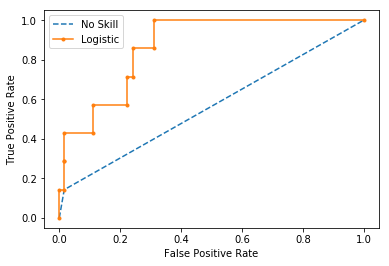

In [25]:
# plot roc curves
plot_roc_curve(testy, naive_probs, model_probs)

시작에서 보았듯이, 이 data는 1% 만이 positive 한, 심각한 imbalanced data 이다.  
위에는 랜덤분류기와 Logit분류기를 ROC-AUC Curve로 보여줬다.  
이 imbalanced data를 다른 metice으로 평가해보자.  
Precision-Recall Curve ~~ 

In [26]:
# pr curve and pr auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
 
# plot no skill and model precision-recall curves
def plot_pr_curve(test_y, model_probs):
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(test_y[test_y==1]) / len(test_y)
    # plot the no skill precision-recall curve
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # plot model precision-recall curve
    precision, recall, _ = precision_recall_curve(testy, model_probs)
    pyplot.plot(recall, precision, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
 

In [27]:
# # generate 2 class dataset
# X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# # split into train/test sets with same class ratio
# trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# # no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
print(yhat[0:5])
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)

[[1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]
 [1.000000 0.000000]]
No Skill PR AUC: 0.007


In [37]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
print(yhat.shape,'\n',yhat[0:5])
model_probs = yhat[:, 1]

(500, 2) 
 [[0.957972 0.042028]
 [0.998611 0.001389]
 [0.993158 0.006842]
 [0.971323 0.028677]
 [0.999533 0.000467]]


Logistic PR AUC: 0.228


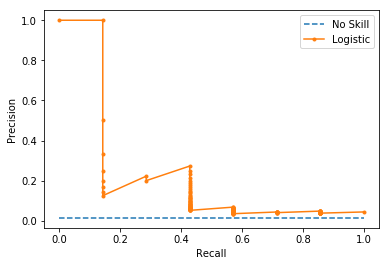

In [39]:
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(testy, model_probs)

No Skill ROC AUC __0.563__ / Logistic ROC AUC __0.869__  

No Skill PR AUC: __0.007__ / Logistic PR AUC: __0.228__  

ROC_AUC 의 값이 전체적으로 후하다는 것을 알 수 있다. 이를 이해하기 위해서는 두 metic이 전달하고자 하는 의미를 이해하는 것이 중요하다.  

**ROC_AUC : 모든 class 에 대한 종합적인 평가**  
**PR AUC : Positive class 에 대한 평가 (즉 minor class)**  

왜냐하면, Precision , Recall 값은 수식을 생각해보면 된다.  
<span style='color:blue'>두 값 모두 TP가 분자이고, 분모는 TP+FP,TP+FN 으로 FN(여기서는 major class)에 대한 의미가 전달되지 않기 때문이다.</span>

실제로 logistic이 도출한 결과를 보면, 대부분의 확률값은 0 으로 예측한다.

In [41]:
from collections import Counter
# predict class labels
yhat = model.predict(testX)
# summarize the distribution of class labels
print(Counter(yhat))

Counter({0: 500})


In [44]:
# create a histogram of the predicted probabilities
pos_probs = yhat[:, 1]
pyplot.hist(pos_probs, bins=100)
pyplot.show()

IndexError: too many indices for array